<a href="https://colab.research.google.com/github/Homyaka/LabML/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Обучите случайный лес, задав только гиперпараметры `n_estimators=100` и `random_state=0`. Оцените важность признаков. Укажите название двух наиболее важных признаков. 

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

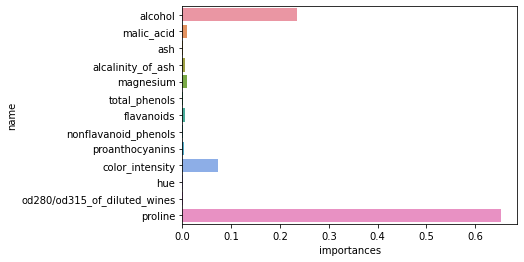

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import pandas as pd

data = load_wine()
X = data.data     
Y = data.target
mask=(Y!=2)
X=X[mask]
Y=Y[mask]
clf = RandomForestRegressor(n_estimators=100,random_state=0)
clf.fit(X, Y)
clf.feature_importances_
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':data.feature_names})
sns.barplot(x="importances", y="name", data=feature_imp)
data.feature_names
#alcohol и proline

2. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Отмасштабируйте признаки, используя класс StandardScaler с гиперпараметрами по умолчанию. Обучите случайный лес, задав только гиперпараметры  `n_estimators = 100` и `random_state=0`. Оцените важность признаков. Укажите название двух наиболее важных признаков.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import pandas as pd


data = load_wine()
X = data.data     
Y = data.target
mask=(Y!=2)
X=X[mask]
Y=Y[mask]


Ниже приведена неполная реализация класса Bagging который имеет методы `fit` для обучения бэггинга над `DecisionTreeRegressor` и метод `predict` для предсказания. Допишите необходимый код, чтобы реализовать бэггинг.

используемы переменные в коде:
- `self.n_estimators`, `n_estimators` - число используемых деревьев
- `self.regressors` - список объектов класса `DecisionTreeRegressor`, к которым уже был применён метод `fit`
Данный список необъодимо заполнить в методе `fit` и использовать для предсказания в методе `predict`
- `ind`-  выбранные индексы объектов при бутстрапе

при создании объекта класса `DecisionTreeRegressor` зафиксируйте  
`random_state=0`

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
class Bagging():
  def __init__(self, n_estimators=10):
    self.n_estimators = n_estimators
    self.regressors = []
  def fit(self, x_train, y_train):
    for i in range(self.n_estimators):
      np.random.seed(i)
      ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
      ####
  def predict(self, x_test):
    ####

Загрузите данные приложенные к заданию

In [17]:
import pandas as pd
from google.colab import files
data = pd.read_csv('data.csv')

Положим матрицу объекты-признаки в переменную `X`, а ответы в переменную `y`

In [18]:
X, y = data.iloc[:, :100], data.iloc[:, 100]


Положим первые 6000 объектов в обучающую часть, остальные объекты в тестовую часть

In [19]:
x_train, y_train = X[:6000], y[:6000]
x_test, y_test = X[6000:], y[6000:]

3. Обучите бэггинг на 1 дереве. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [ ]:
clf = RandomForestRegressor(n_estimators=100, max_features=0.2)
clf.fit()

4. Обучите бэггинг на 5 деревьях. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

5. Обучите бэггинг на 100 деревьях. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

6. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 1`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

7. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 1`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

8. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 5`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

9. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 100`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

10. Изучите документацию и разберитесь как посчитать Out-of-bag ошибку в RandomForestRegressor. Обучите RandomForestRegressor с гиперпараметром n_estimators=100 на обучающей части, зафиксируйте  
`random_state=0`. Найдите Out-of-bag ошибку алгоритма. Ответ округлите до сотых.